In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier as ad, export_graphviz
from sklearn.ensemble import BaggingClassifier

import graphviz

basePre = pd.read_csv('./bases/base_pre.csv')
baseScaled = pd.read_csv('./bases/base_scaled.csv')
basePCACompleta = pd.read_csv('./bases/base_train_completa.csv')
basePCAInversa = pd.read_csv('./bases/base_train_correlacao_inversa.csv')
basePCAProporcional = pd.read_csv('./bases/base_train_correlacao_proporcional.csv')
basePca70 = pd.read_csv('./bases/base_train_70.csv')
basePca50 = pd.read_csv('./bases/base_train_50.csv')

cv=5

c = 'entropy'
msl = 5
mss = 5
md = None
rs=0

clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

SINGLE EXECUTION

Applying in baseScaled

In [2]:
Y = basePre['target']

x_train, x_test, y_train, y_test = train_test_split(baseScaled, Y, test_size=0.30, random_state=0)

clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)
clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [3]:
sc = cross_val_score(clf, baseScaled, Y, cv=cv)

In [4]:
accArray = np.array([[sc.mean(), sc.std()*2]])

Applying in basePCAInversa

In [5]:
x_train, x_test, y_train, y_test = train_test_split(basePCAInversa, Y, test_size=0.30, random_state=0)

clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)
clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [6]:
sc = cross_val_score(clf, basePCAInversa, Y, cv=cv)

In [7]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

Applying in basePCAProporcional

In [8]:
x_train, x_test, y_train, y_test = train_test_split(basePCAProporcional, Y, test_size=0.30, random_state=0)

clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)
clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [9]:
sc = cross_val_score(clf, basePCAProporcional, Y, cv=cv)

In [10]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA  com 70%

In [11]:
x_train, x_test, y_train, y_test = train_test_split(basePca70, Y, test_size=0.30, random_state=0)

clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)
clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [12]:
sc = cross_val_score(clf, basePca70, Y, cv=cv)

In [13]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA com 50%

In [14]:
x_train, x_test, y_train, y_test = train_test_split(basePca50, Y, test_size=0.30, random_state=0)

clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)
clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
sc = cross_val_score(clf, basePca50, Y, cv=cv)

In [16]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [17]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [18]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,76.0,10.0
1,71.0,9.0
2,69.0,3.0
3,75.0,9.0
4,79.0,8.0


In [19]:
from plt import *

single(dfAcc, 'adSingle.png', '#2E8B57', '#F08080')

BAGGING com a melhor single

In [20]:
clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)

model = BaggingClassifier(clf, n_estimators=5, random_state=0)

sc = cross_val_score(model, basePca50, Y, cv=cv)

In [21]:
accArray = np.array([[sc.mean(), sc.std()*2]])

In [22]:
clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)

model = BaggingClassifier(clf, n_estimators=10, random_state=0)

sc = cross_val_score(model, basePca50, Y, cv=cv)

In [23]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [24]:
clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)

model = BaggingClassifier(clf, n_estimators=20, random_state=0)

sc = cross_val_score(model, basePca50, Y, cv=cv)

In [25]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [26]:
clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)

model = BaggingClassifier(clf, n_estimators=30, random_state=0)

sc = cross_val_score(model, basePca50, Y, cv=cv)

In [27]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [28]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [29]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,81.0,11.0
1,81.0,12.0
2,83.0,10.0
3,82.0,9.0


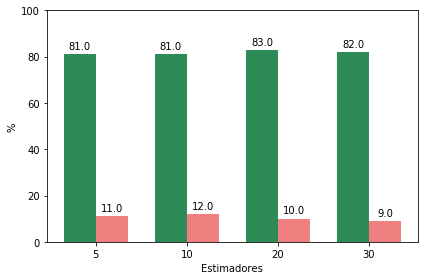

In [30]:
bagging(dfAcc, 'adBagging.png', '#2E8B57', '#F08080')

In [ ]:
def plotTree(tree, df, labelCol, plotTitle):
    cols = df.drop('target', azxis=1).columns
    
    graphData = export_graphviz(tree, out_file=None, feature_names=cols, class_names=True, filled=True, rounded=True)
    
    graph = graphviz.Source(graphData)
    graph.render(plotTitle)
    return graph

In [32]:
data = baseScaled

x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size=0.30, random_state=0)

clf = ad(criterion=c,min_samples_leaf=msl,min_samples_split=mss,max_depth=md,random_state=rs)
clf.fit(x_train, y_train)

cols = data.columns
    
graphData = export_graphviz(clf, out_file=None, feature_names=cols, class_names=True, filled=True, rounded=True)

graph = graphviz.Source(graphData)
graph.render('Heart Disease')

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Heart Disease'], make sure the Graphviz executables are on your systems' PATH